In [1]:
%reset -f
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

"""
############  Attributions ###################
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
# https://stackoverflow.com/questions/9750330/how-to-convert-integer-into-date-object-python/37674465
# https://stackoverflow.com/questions/2623156/how-to-convert-the-integer-date-format-into-yyyymmdd
# https://stackoverflow.com/questions/40511476/how-to-properly-use-funcformatterfunc
# https://stackoverflow.com/questions/58881360/python-plot-shows-numbers-instead-of-dates-on-x-axis

# Yves Hilpisch "Python for Finance"
# Theodore Petrou "Pandas Cookbook"
# Joel Grus "Data Science from Scratch"
# Daniel Chen "Pandas for Everyone"
# Wes McKinney "Python for Data Analysis"
# Jake VanderPlas "Python Data Science Handbook"
#############################################
"""
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,}".format

In [2]:
df = pd.read_excel("sjr.xlsx")
df = df.iloc[:16]
df.head()

,date,tot_rev_mils,wline_rev,wline_cust_tot,wline_con_cust_tot,wline_biz_cust_tot,wless_rev,wless_cust_tot,wline_con_cab,wline_con_sat,wline_con_int,wline_con_ph,wline_biz_cab,wline_biz_sat,wline_biz_int,wline_biz_ph,wless_post,wless_pre,source,notes and variable definitions dictionary
0,2020-11-30,"1,370.0","1,053.0","5,156,262.0","4,510,873.0","645,389.0",317.0,"1,922,543.0","1,356,083.0","617,140.0","1,888,800.0","648,850.0","37,479.0","38,367.0","179,461.0","390,082.0","1,569,471.0","353,072.0",https://www.sec.gov/Archives/edgar/data/932872...,Intersegment eliminations are netted against W...
1,2020-08-31,"1,349.0","1,055.0","5,257,169.0","4,617,725.0","639,444.0",294.0,"1,821,514.0","1,390,520.0","650,727.0","1,903,868.0","672,610.0","37,512.0","36,002.0","178,270.0","387,660.0","1,482,175.0","339,339.0",https://www.sec.gov/Archives/edgar/data/932872...,{'tot_revenue_mils': 'total revenue in million...
2,2020-05-31,"1,312.0","1,060.0","5,328,412.0","4,697,228.0","631,184.0",252.0,"1,761,690.0","1,423,509.0","658,027.0","1,918,320.0","697,372.0","35,832.0","34,253.0","174,124.0","386,975.0","1,437,218.0","324,472.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN
3,2020-02-29,"1,363.0","1,061.0","5,383,705.0","4,744,693.0","639,012.0",302.0,"1,767,155.0","1,445,113.0","658,137.0","1,923,423.0","718,020.0","40,686.0","39,088.0","174,042.0","385,196.0","1,434,982.0","332,173.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN
4,2019-11-30,"1,383.0","1,065.0","5,434,210.0","4,794,689.0","639,521.0",318.0,"1,716,096.0","1,464,423.0","671,348.0","1,917,351.0","741,567.0","43,465.0","37,989.0","174,380.0","383,687.0","1,380,693.0","335,403.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   date                                       16 non-null     datetime64[ns]
 1   tot_rev_mils                               16 non-null     float64       
 2   wline_rev                                  16 non-null     float64       
 3   wline_cust_tot                             16 non-null     float64       
 4   wline_con_cust_tot                         16 non-null     float64       
 5   wline_biz_cust_tot                         16 non-null     float64       
 6   wless_rev                                  16 non-null     float64       
 7   wless_cust_tot                             16 non-null     float64       
 8   wline_con_cab                              16 non-null     float64       
 9   wline_con_sat          

<ipython-input-4-88ce8b073a09>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation="vertical")


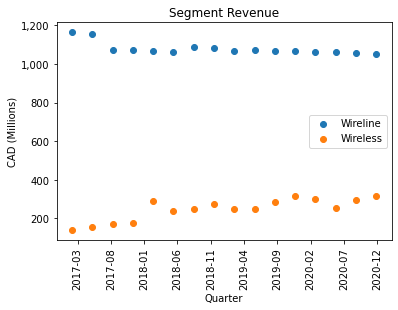

In [4]:
# Segment revenue graph- object oriented approach.
fig, ax = plt.subplots()
# Create first time series line with the appropriate label.
ax.scatter(df["date"], df["wline_rev"], label="Wireline")
# Create second time series line with the appropriate lable.
ax.scatter(df["date"], df["wless_rev"], label="Wireless")
# Title of graph.
ax.set_title("Segment Revenue")
# Labels for the x and y axes, respectively.
ax.set_xlabel("Quarter")
ax.set_ylabel("CAD (Millions)")
# Feed in the ticks for the x axis, rotate them, and display as dates.
ax.set_xticklabels(ax.get_xticks(), rotation="vertical")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# Specify the maximum number of ticks. This option makes the ticks
# line up better and run through all of the time series. Without
# this option the last time tick is 2020-02.
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# Include the legend in the graph.
ax.legend()
# Format the y axis numbers to have a comma separater.
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
# Save the figure and the "bbox_inches" option keeps the saved
# image from having the x axis labels cut off.
plt.savefig("Segment_Revenue.pdf", bbox_inches="tight")

<ipython-input-5-72f83cec529c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation="vertical")


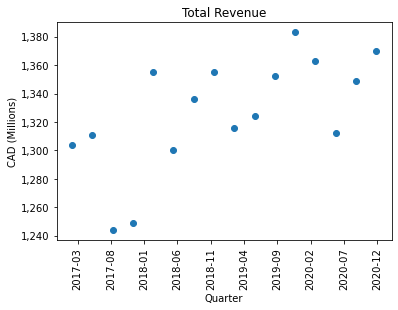

In [5]:
# Total Revenue graph- object oriented approach.
fig, ax = plt.subplots()
# Create first time series line with the appropriate label.
ax.scatter(df["date"], df["tot_rev_mils"])
# Title of graph.
ax.set_title("Total Revenue")
# Labels for the x and y axes, respectively.
ax.set_xlabel("Quarter")
ax.set_ylabel("CAD (Millions)")
# Feed in the ticks for the x axis, rotate them, and display as dates.
ax.set_xticklabels(ax.get_xticks(), rotation="vertical")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# Specify the maximum number of ticks. This option makes the ticks
# line up better and run through all of the time series. Without
# this option the last time tick is 2020-02.
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# Format the y axis numbers to have a comma separater.
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
# Save the figure and the "bbox_inches" option keeps the saved
# image from having the x axis labels cut off.
plt.savefig("Total_Revenue.pdf", bbox_inches="tight")

In [6]:
# Individual Segment Models #
# Estimate Wireline average revenue per customer 2/28/17 through 11/30/19.
# This is the training period. The "test set" for "out of sample"
# model accuracy tests is 2/29/20 through 11/30/20.
y = df["wline_rev"].iloc[4:]
x = df["wline_cust_tot"].iloc[4:]
model = sm.OLS(y, x).fit()
model.summary()
model.params
wline_mfx = model.params[0] * 1000000
wline_mfx

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


191.80795736374938

In [7]:
# Individual Segment Model
# Estimate Wireless average revenue per customer for the same training period.
y = df["wless_rev"].iloc[4:]
x = df["wless_cust_tot"].iloc[4:]
model = sm.OLS(y, x).fit()
model.summary()
wless_mfx = model.params[0] * 1000000
wless_mfx

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


170.93691137627562

In [8]:
print(
    "The estimated difference in revenue per customer from\
    the segment models is",
    wline_mfx - wless_mfx,
)

The estimated difference in revenue per customer from    the segment models is 20.871045987473764


In [9]:
# Total Revenue Model
# Estimate Wireline average revenue per customer 2/28/17 through 11/30/19.
# This is the training period. The "test set" period for "out of sample"
# model accuracy tests is 2/29/20 through 11/30/20.
y = df["tot_rev_mils"].iloc[4:]
x = df[["wline_cust_tot", "wless_cust_tot"]].iloc[4:]
model = sm.OLS(y, x).fit()
model.summary()
model.params
wline_nested_slope = model.params[0] * 1000000
wless_nested_slope = model.params[1] * 1000000

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
print(wline_nested_slope)
print(wless_nested_slope)
print(
    "The estimated difference in revenue per customer from\
    the total revenue model is",
    wline_nested_slope - wless_nested_slope,
)

# The individual segment model estimates Wireline at $191 and Wireless at $170.
# The total revenue model estimates Wireline at $176 and Wireless at $232.

176.5643125475334
232.69388566005156
The estimated difference in revenue per customer from    the total revenue model is -56.12957311251816


In [11]:
# Averaging Approach
# Alternative approach to average revenue per customer using averages
df["wline_avg_per_cust"] = (
    df["wline_rev"].iloc[4:] / df["wline_cust_tot"].iloc[4:]
) * 1000000
df["wless_avg_per_cust"] = (
    df["wless_rev"].iloc[4:] / df["wless_cust_tot"].iloc[4:]
) * 1000000

In [12]:
print(df["wline_avg_per_cust"].mean())
print(df["wless_avg_per_cust"].mean())

print(
    "The estimated differnce in revenue per customer from averaging is",
    df["wline_avg_per_cust"].mean() - df["wless_avg_per_cust"].mean(),
)

191.88509153745125
168.01274591330912
The estimated differnce in revenue per customer from averaging is 23.872345624142127


In [13]:
# Comparison of total revenue predictions from 1) Individual Segment Models and
# 2) Total Revenue Model for the "test set" sample period of
# 2/29/20 through 11/30/20.
df["indiv_yhat"] = wline_mfx * df["wline_cust_tot"] \
                   + (wless_mfx * df["wless_cust_tot"])


df["indiv_yhat"] = (df["indiv_yhat"] / 1000000).round()

df["indiv_wline_yhat"] = wline_mfx * df["wline_cust_tot"]
df["indiv_wless_yhat"] = wless_mfx * df["wless_cust_tot"]

df["indiv_wline_yhat"] = (df["indiv_wline_yhat"] / 1000000).round()
df["indiv_wless_yhat"] = (df["indiv_wless_yhat"] / 1000000).round()

df["total_yhat"] = wline_nested_slope * df["wline_cust_tot"] \
                   + (wless_nested_slope * df["wless_cust_tot"])

df["total_yhat"] = (df["total_yhat"] / 1000000).round()

df["total_wline_yhat"] = wline_nested_slope * df["wline_cust_tot"]

df["total_wless_yhat"] = wless_nested_slope * df["wless_cust_tot"]

df["total_wline_yhat"] = (df["total_wline_yhat"] / 1000000).round()
df["total_wless_yhat"] = (df["total_wless_yhat"] / 1000000).round()

df["indiv_sr"] = (df["indiv_yhat"].iloc[:4] - df["tot_rev_mils"].iloc[:4]) ** 2
df["total_sr"] = (df["total_yhat"].iloc[:4] - df["tot_rev_mils"].iloc[:4]) ** 2

In [14]:
df[["indiv_sr", "total_sr"]].iloc[:4]

,indiv_sr,total_sr
0,"2,704.0",144.0
1,841.0,9.0
2,121.0,"1,521.0"
3,784.0,1.0


In [15]:
df[["indiv_sr", "total_sr"]].sum()

indiv_sr   4,450.0
total_sr   1,675.0
dtype: float64

In [16]:
df["indiv_sr"].sum() / df["total_sr"].sum()

# The sum of the squared difference between the predictions and
# actual values in the hold out sample period are approximately
# 2.7 times larger for the Individual Segment Models model compared
# to the Total Revenue Model.

2.656716417910448

In [17]:
df[
    [
        "date",
        "tot_rev_mils",
        "indiv_yhat",
        "total_yhat",
        "wline_rev",
        "indiv_wline_yhat",
        "total_wline_yhat",
        "wless_rev",
        "indiv_wless_yhat",
        "total_wless_yhat",
        "indiv_sr",
        "total_sr"
    ]
].iloc[:4]

# Above shows that, while the Total Revenue Model estimates the
# Wireless segment revenue to be much higher than it is, the overall
# performance when predicting total revenue from all segments
# superior to Individual Segment Models.

,date,tot_rev_mils,indiv_yhat,total_yhat,wline_rev,indiv_wline_yhat,total_wline_yhat,wless_rev,indiv_wless_yhat,total_wless_yhat,indiv_sr,total_sr
0,2020-11-30,"1,370.0","1,318.0","1,358.0","1,053.0",989.0,910.0,317.0,329.0,447.0,"2,704.0",144.0
1,2020-08-31,"1,349.0","1,320.0","1,352.0","1,055.0","1,008.0",928.0,294.0,311.0,424.0,841.0,9.0
2,2020-05-31,"1,312.0","1,323.0","1,351.0","1,060.0","1,022.0",941.0,252.0,301.0,410.0,121.0,"1,521.0"
3,2020-02-29,"1,363.0","1,335.0","1,362.0","1,061.0","1,033.0",951.0,302.0,302.0,411.0,784.0,1.0


<ipython-input-18-e30deb90d946>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation="vertical")


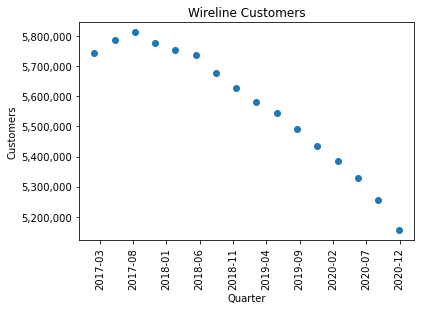

In [18]:
# Scatterplot of Wireline customers- object oriented approach.
fig, ax = plt.subplots()
# Create first time series line with the appropriate label.
ax.scatter(df["date"], df["wline_cust_tot"])
# Title of graph.
ax.set_title("Wireline Customers")
# Labels for the x and y axes, respectively.
ax.set_xlabel("Quarter")
ax.set_ylabel("Customers")
# Feed in the ticks for the x axis, rotate them, and display as dates.
ax.set_xticklabels(ax.get_xticks(), rotation="vertical")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# Specify the maximum number of ticks. This option makes the ticks line up
# better and run through all of the time series. Without this option the
# last time tick is 2020-02.
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# Format the y axis numbers to have a comma separater.
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
# Save the figure and the "bbox_inches" option keeps the saved image
# from having the x axis labels cut off.
plt.savefig("Wireline_Customers.pdf", bbox_inches="tight")

<ipython-input-19-00a81a456f0e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation="vertical")


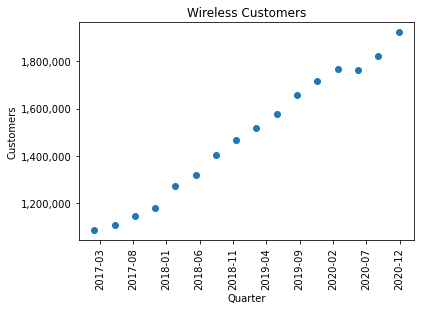

In [19]:
# Scatterplot of Wireless customers- object oriented approach.
fig, ax = plt.subplots()
# Create first time series line with the appropriate label.
ax.scatter(df["date"], df["wless_cust_tot"])
# Title of graph.
ax.set_title("Wireless Customers")
# Labels for the x and y axes, respectively.
ax.set_xlabel("Quarter")
ax.set_ylabel("Customers")
# Feed in the ticks for the x axis, rotate them, and display as dates.
ax.set_xticklabels(ax.get_xticks(), rotation="vertical")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# Specify the maximum number of ticks. This option makes the
# ticks line up better and run through all of the time series.
# Without this option the last time tick is 2020-02.
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# Format the y axis numbers to have a comma separater.
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
# Save the figure and the "bbox_inches" option keeps the saved image from
# having the x axis labels cut off.
plt.savefig("Wireless_Customers.pdf", bbox_inches="tight")

In [20]:
# Create a linear trend term. Note that the most recent obs is first
# in the dataset. Sort the data with oldest first before creating the trend.

df.sort_values(by=["date"], inplace=True)
df.reset_index(drop=True, inplace=True)

df["trend"] = df.index + 1
df["trend"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
Name: trend, dtype: int64

In [21]:
# Models to forecast the number of customers for each segment.
y = df["wline_cust_tot"]
x = df["trend"]
x_model = sm.add_constant(x)
model = sm.OLS(y, x_model).fit()
model.summary()
model.params
wline_cons = model.params[0]
wline_slope = model.params[1]

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
wline_cons

5923616.125000003

In [23]:
wline_slope

-41812.029411764786

In [24]:
y = df["wless_cust_tot"]
x = df["trend"]
x_model = sm.add_constant(x)
model = sm.OLS(y, x_model).fit()
model.summary()
model.params
wless_cons = model.params[0]
wless_slope = model.params[1]

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [25]:
wless_cons

991871.1750000005

In [26]:
wless_slope

57744.22941176468

In [27]:
# Create a dataframe with a one year ahead out of sample period, quarterly.
df_newdates = pd.DataFrame(
    ["20210228", "20210531", "20210831", "20211130"], columns=["date"]
)

# Format the dates as datetimes.
df_newdates["date"] = pd.to_datetime(df_newdates["date"], format="%Y%m%d")

In [28]:
df_newdates

,date
0,2021-02-28
1,2021-05-31
2,2021-08-31
3,2021-11-30


In [29]:
df_newdates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 160.0 bytes


In [30]:
# Append the out of sample quarters into the original dataframe.
df = df.append(df_newdates)
df.reset_index(drop=True, inplace=True)
df

,date,tot_rev_mils,wline_rev,wline_cust_tot,wline_con_cust_tot,wline_biz_cust_tot,wless_rev,wless_cust_tot,wline_con_cab,wline_con_sat,wline_con_int,wline_con_ph,wline_biz_cab,wline_biz_sat,wline_biz_int,wline_biz_ph,wless_post,wless_pre,source,notes and variable definitions dictionary,wline_avg_per_cust,wless_avg_per_cust,indiv_yhat,indiv_wline_yhat,indiv_wless_yhat,total_yhat,total_wline_yhat,total_wless_yhat,indiv_sr,total_sr,trend
0,2017-02-28,"1,304.0","1,164.0","5,742,051.0","5,171,048.0","571,003.0",140.0,"1,086,185.0","1,650,789.0","770,294.0","1,818,072.0","931,893.0","53,475.0","32,000.0","173,144.0","312,384.0","714,917.0","371,268.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,202.71502290732005,128.89148717759863,"1,287.0","1,101.0",186.0,"1,267.0","1,014.0",253.0,NaN,NaN,1.0
1,2017-05-31,"1,311.0","1,157.0","5,786,424.0","5,209,565.0","576,859.0",154.0,"1,106,159.0","1,663,710.0","776,825.0","1,838,964.0","930,066.0","53,522.0","30,991.0","172,709.0","319,637.0","735,002.0","371,157.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,199.95078134613019,139.22049180994776,"1,299.0","1,110.0",189.0,"1,279.0","1,022.0",257.0,NaN,NaN,2.0
2,2017-08-31,"1,244.0","1,072.0","5,811,776.0","5,231,359.0","580,417.0",172.0,"1,147,173.0","1,671,277.0","773,542.0","1,861,009.0","925,531.0","51,039.0","31,535.0","170,644.0","327,199.0","764,091.0","383,082.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,184.45308284421148,149.9337937695535,"1,311.0","1,115.0",196.0,"1,293.0","1,026.0",267.0,NaN,NaN,3.0
3,2017-11-30,"1,249.0","1,074.0","5,777,925.0","5,193,122.0","584,803.0",175.0,"1,181,483.0","1,653,269.0","753,037.0","1,878,703.0","908,113.0","50,334.0","31,023.0","170,150.0","333,296.0","797,141.0","384,342.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,185.87987902231336,148.11893188475838,"1,310.0","1,108.0",202.0,"1,295.0","1,020.0",275.0,NaN,NaN,4.0
4,2018-02-28,"1,355.0","1,065.0","5,752,290.0","5,161,740.0","590,550.0",290.0,"1,271,185.0","1,635,554.0","748,736.0","1,884,179.0","893,271.0","49,934.0","32,353.0","170,312.0","337,951.0","890,649.0","380,536.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,185.1436558309821,228.13359188473748,"1,321.0","1,103.0",217.0,"1,311.0","1,016.0",296.0,NaN,NaN,5.0
5,2018-05-31,"1,300.0","1,063.0","5,737,865.0","5,137,456.0","600,409.0",237.0,"1,317,844.0","1,619,222.0","757,802.0","1,880,425.0","880,007.0","49,683.0","32,884.0","171,125.0","346,717.0","944,838.0","373,006.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,185.26054551649437,179.83919189221183,"1,326.0","1,101.0",225.0,"1,320.0","1,013.0",307.0,NaN,NaN,6.0
6,2018-08-31,"1,336.0","1,086.0","5,678,634.0","5,066,426.0","612,208.0",250.0,"1,402,858.0","1,585,232.0","750,403.0","1,876,944.0","853,847.0","49,606.0","34,831.0","172,859.0","354,912.0","1,029,720.0","373,138.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,191.24317573557303,178.2076304230364,"1,329.0","1,089.0",240.0,"1,329.0","1,003.0",326.0,NaN,NaN,7.0
7,2018-11-30,"1,355.0","1,082.0","5,625,823.0","5,003,414.0","622,409.0",273.0,"1,468,473.0","1,561,464.0","721,510.0","1,882,550.0","837,890.0","49,352.0","35,389.0","174,107.0","363,561.0","1,115,787.0","352,686.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,192.3274159176355,185.9074017704105,"1,330.0","1,079.0",251.0,"1,335.0",993.0,342.0,NaN,NaN,8.0
8,2019-02-28,"1,316.0","1,069.0","5,581,193.0","4,955,023.0","626,170.0",247.0,"1,516,256.0","1,532,511.0","711,883.0","1,893,655.0","816,974.0","47,887.0","36,219.0","172,667.0","369,397.0","1,180,457.0","335,799.0",https://www.sec.gov/Archives/edgar/data/932872...,NaN,191.53611064874482,162.90125150370386,"1,330.0","1,071.0",259.0,"1,338.0",985.0,353.0,NaN,NaN,9.0
9,2019-05-31,"1,324.0","1,073.0","5,546,022.0","4,918,984.0","627,038.0",251.0,"1,578,355.0","1,508,208.0","715,017.0","1,900,302.0","795,457.0","43,586.0","35,593.0","173,094.0","374,765.0","1,241,736.0","336,619.0",https://www.

In [31]:
# Recalculate the time trend.
df["trend"] = df.index + 1

# Re-estimate the marginal effects of each Wireline and Wireless customer
# on total revenue using the Total Revenue Model on the entire sample period.
y = df["tot_rev_mils"].iloc[:16]
x = df[["wline_cust_tot", "wless_cust_tot"]].iloc[:16]
model = sm.OLS(y, x).fit()
model.summary()
model.params
wline_nested_slope = model.params[0] * 1000000
wless_nested_slope = model.params[1] * 1000000

C:\Users\Robso\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
wline_nested_slope

177.51793398014055

In [33]:
wless_nested_slope

227.91970800157858

In [34]:
# Create one-year ahead predictions for customers by segment from the
# OLS estimates.
df["wline_cust_pred"] = (wline_cons + (wline_slope * df["trend"])).round()
df["wless_cust_pred"] = (wless_cons + (wless_slope * df["trend"])).round()

# Create one-year ahead forecasts based on Total Revenue Model for the entire
# sample period.
df["tot_rev_nested_pred"] = (
    (
        wline_nested_slope * df["wline_cust_pred"]
        + wless_nested_slope * df["wless_cust_pred"]
    )
    / 1000000
).round(2)

# Create one-year ahead forecasts based on Total Revenue Model for the training
# sample period. This is being done as a robustness check.
df["tot_rev_nested_pred_prior_betas"] = (
    (181.57 * df["wline_cust_pred"] + 215.14 * df["wless_cust_pred"]) / 1000000
).round(2)

<ipython-input-35-addea4c1444c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation="vertical")


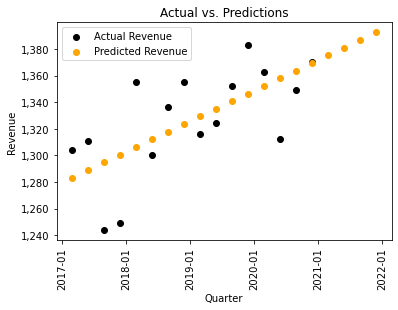

In [35]:
fig, ax = plt.subplots()
ax.scatter(
    df["date"], df["tot_rev_mils"], label="Actual Revenue", color="black"
)
ax.scatter(
    df["date"],
    df["tot_rev_nested_pred"],
    label="Predicted Revenue",
    color="orange",
)
ax.set_title("Actual vs. Predictions")
ax.set_xlabel("Quarter")
ax.set_ylabel("Revenue")
ax.legend()
ax.set_xticklabels(ax.get_xticks(), rotation="vertical")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.savefig("Actual_v_Pred.pdf", bbox_inches="tight")
